In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
file_path = "heart.xlsx"  # (already uploaded)
df = pd.read_excel(file_path)
df.head()


,age_yr,sex_M_F,chest_pain_value,resting_BP_mm_Hg,cholesterol_mg_dl,fasting_blood_sugar_high,ECG_value,max_HR,exercise_angina,ST_depresssion_exercise,ST_slope_peak,number_vessels_involved,defect_diag,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [6]:
X = df.drop('heart_disease', axis=1)  # All features except the label
y = df['heart_disease']  # Target column


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/Users/judy/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [18]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Accuracy: 90.74%

Confusion Matrix:
[[31  2]
 [ 3 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



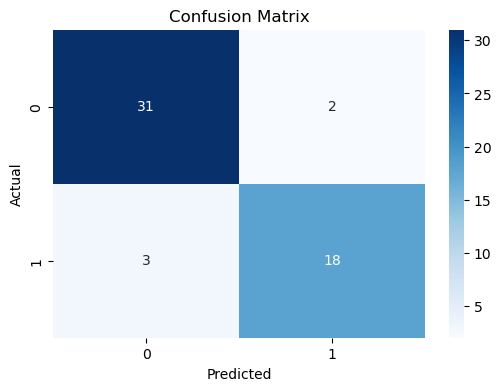

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

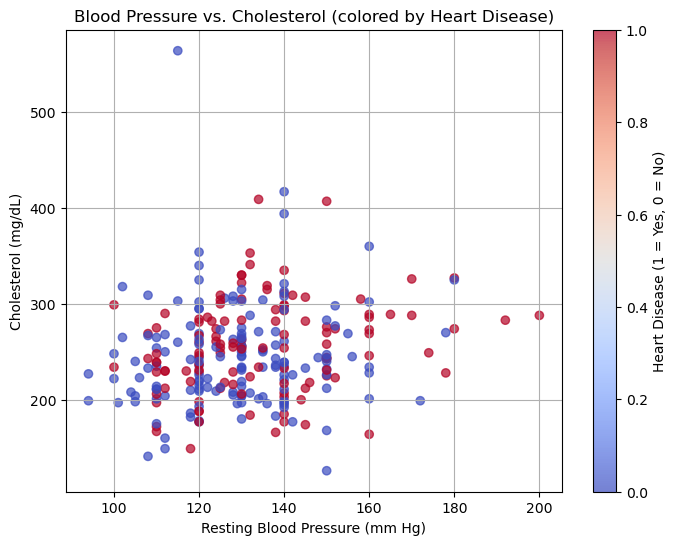

In [22]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['resting_BP_mm_Hg'], df['cholesterol_mg_dl'], 
            c=df['heart_disease'], cmap='coolwarm', alpha=0.7)

# Add labels and title
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Cholesterol (mg/dL)')
plt.title('Blood Pressure vs. Cholesterol (colored by Heart Disease)')
plt.colorbar(label='Heart Disease (1 = Yes, 0 = No)')
plt.grid(True)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Features and labels for logistic regression
Xlr = X_train
ylr = y_train

# Try different values of C
Cs = [0.01, 0.1, 1, 10, 100]
cv_scores = []

for c in Cs:
    model = LogisticRegression(C=c, max_iter=1000)
    scores = cross_val_score(model, Xlr, ylr, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())
    print(f"C={c}, Avg CV Score={scores.mean():.4f}")

# Best C
best_C = Cs[np.argmax(cv_scores)]
print(f"\nBest value of C: {best_C}")

C=0.01, Avg CV Score=0.8198
C=0.1, Avg CV Score=0.8059
C=1, Avg CV Score=0.8244
C=10, Avg CV Score=0.8152
C=100, Avg CV Score=0.8107

Best value of C: 1


In [26]:
# Train model with best C on full training set
best_model = LogisticRegression(C=best_C, max_iter=1000)
best_model.fit(X_train, y_train)

# Evaluate on test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with C={best_C}: {test_accuracy:.4f}")

Test set accuracy with C=1: 0.9074


In [28]:
from sklearn.model_selection import GridSearchCV

# Set up logistic regression and parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(log_reg, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best value of C and score
print(f"Best C from GridSearchCV: {grid.best_params_['C']}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

# Test accuracy
grid_test_acc = grid.score(X_test, y_test)

Best C from GridSearchCV: 1
Best cross-validation score: 0.8244


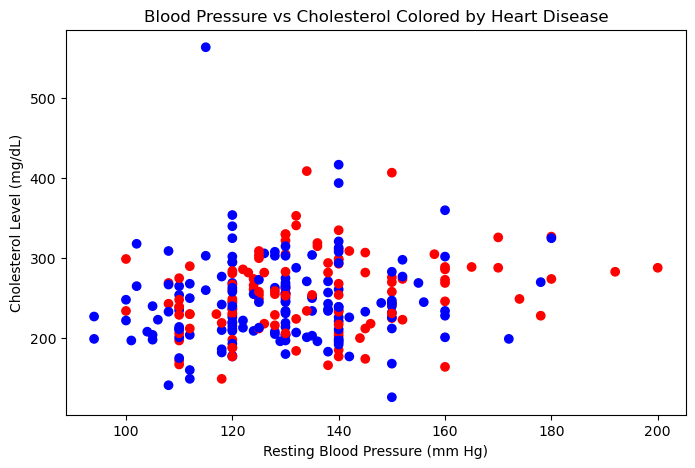

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
colors = df['heart_disease'].map({0: 'blue', 1: 'red'})  # Blue = no heart disease, Red = has heart disease
plt.scatter(df['resting_BP_mm_Hg'], df['cholesterol_mg_dl'], c=colors)
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.title("Blood Pressure vs Cholesterol Colored by Heart Disease")
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_C = None

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    avg_score = scores.mean()
    print(f"C={C}, Average CV Score={avg_score:.4f}")
    
    if avg_score > best_score:
        best_score = avg_score
        best_C = C

print(f"\n✅ Best C value: {best_C} with average CV score: {best_score:.4f}")

C=0.01, Average CV Score=0.8198
C=0.1, Average CV Score=0.8059
C=1, Average CV Score=0.8244
C=10, Average CV Score=0.8152
C=100, Average CV Score=0.8107

✅ Best C value: 1 with average CV score: 0.8244


In [34]:
best_model = LogisticRegression(C=best_C, max_iter=1000)
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print(f"✅ Test Accuracy using best C = {best_C}: {test_accuracy:.4f}")

✅ Test Accuracy using best C = 1: 0.9074


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_model.fit(X_train, y_train)

print(f"✅ Best C from GridSearchCV: {grid_model.best_params_['C']}")
print(f"✅ Test Accuracy: {grid_model.score(X_test, y_test):.4f}")

✅ Best C from GridSearchCV: 1
✅ Test Accuracy: 0.9074
